<a href="https://colab.research.google.com/github/bluishhhxd/VibeVerify/blob/main/Viberverify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516        

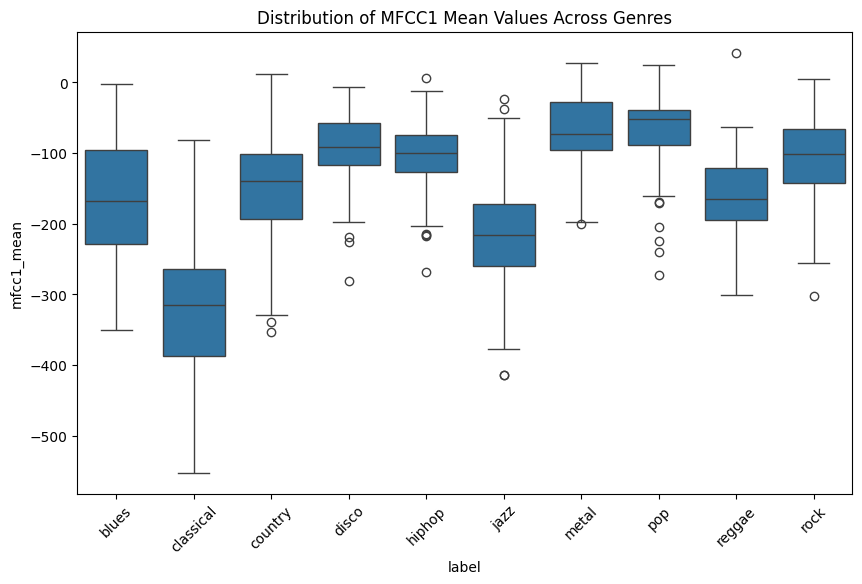

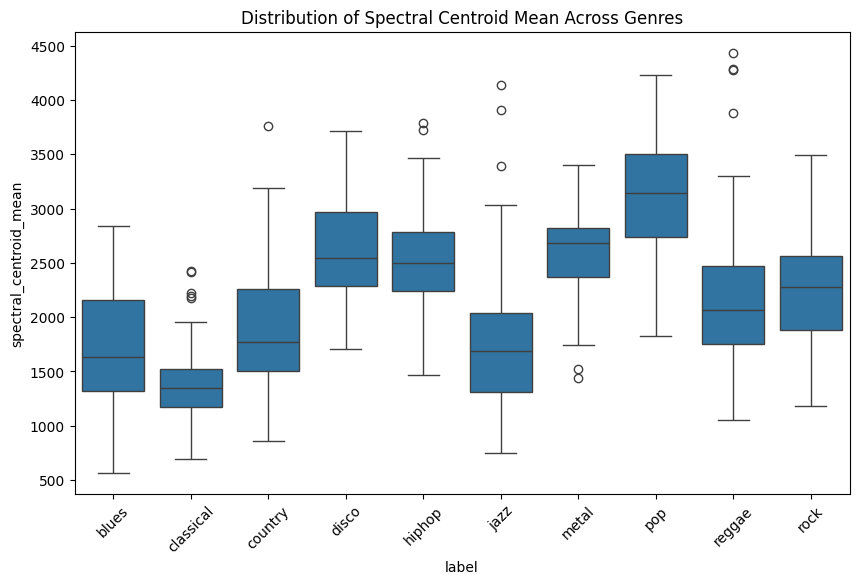

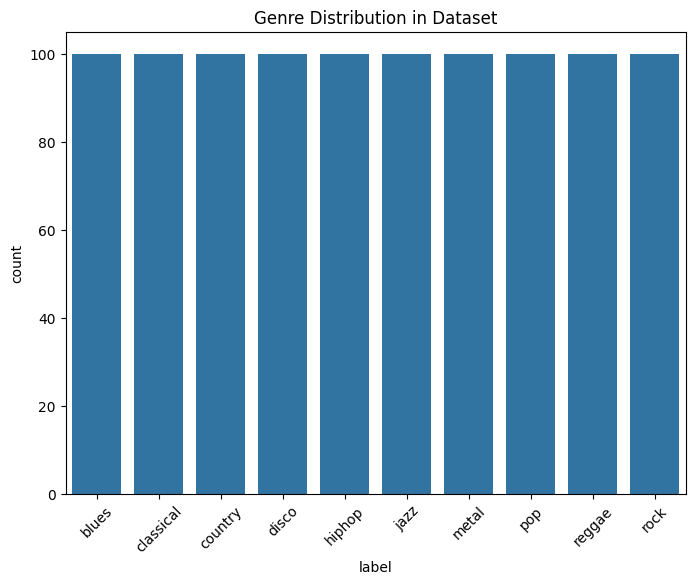

Random Forest Accuracy: 65.50%
SVM Accuracy: 70.00%
KNN Accuracy: 65.50%
Logistic Regression Accuracy: 69.00%
Decision Tree Accuracy: 46.50%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('features_30_sec.csv')

print(data.head())

#Data Pre-processing
data = data.drop(columns=['filename', 'length'])
X = data.drop(columns=['label'])
y = data['label']

# Normalize/Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Data Visualization

# Plot distribution of MFCC1 mean values across genres
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='mfcc1_mean', data=data)
plt.title('Distribution of MFCC1 Mean Values Across Genres')
plt.xticks(rotation=45)
plt.show()


# Plot distribution of spectral centroid mean across genres
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='spectral_centroid_mean', data=data)
plt.title('Distribution of Spectral Centroid Mean Across Genres')
plt.xticks(rotation=45)
plt.show()


# Plot genre distribution in the dataset
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=data)
plt.title('Genre Distribution in Dataset')
plt.xticks(rotation=45)
plt.show()



### Model 1: Random Forest Classifier ###



clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")



### Model 2: Support Vector Machine (SVM) ###



clf_svm = SVC(kernel='linear', C=1)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")



### Model 3: K-Nearest Neighbors (KNN) ###



clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")



### Model 4: Logistic Regression ###



clf_logreg = LogisticRegression(max_iter=1000)
clf_logreg.fit(X_train, y_train)
y_pred_logreg = clf_logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")



### Model 5: Decision Tree ###



clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")